# Making plots with the standard Python plotting library
The standard plotting library in Python is called matplotlib and is modeled after the Matlab plotting library. There are many libraries that look like new libraries for plotting in Python but are actually just a layer on top of this library. So understanding what this can do will help you with most plotting.

In [1]:
import matplotlib.pyplot as plt  # Convention suggests to import as plt
import numpy as np

Here is the simplest call we can make. Things to notice. The axes are black, the line is blue. There are no symbols but a line is drawn connecting the 10 data points. The indeterminate axes is asumed to start at 0 and is the same number of values as deterministic axis. There is a bit of space added to both x and y axis so you can see the ends of the data. It is also making a guess as to how many axis labels to show. Also the size of the plot has a default. Any other things you notice?

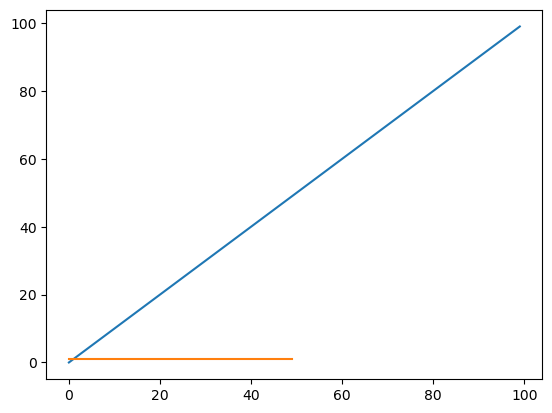

In [2]:
data = np.arange(100)
plt.plot(data)
data2 = np.ones(50)  # What about a second plot of all zeros, but fewer?
plt.plot(data2)
plt.show()  # Not strictly necessary for Jupyter (maybe?) but will be if using terminal window.

## The simplest of plots take two.

Since we are making plots in a Jupyter Notebook we need to tell the notebook we want the plots to be displayed inline. We only need to declare this once for all remaining plots in this Notebook.

In [3]:
%matplotlib inline

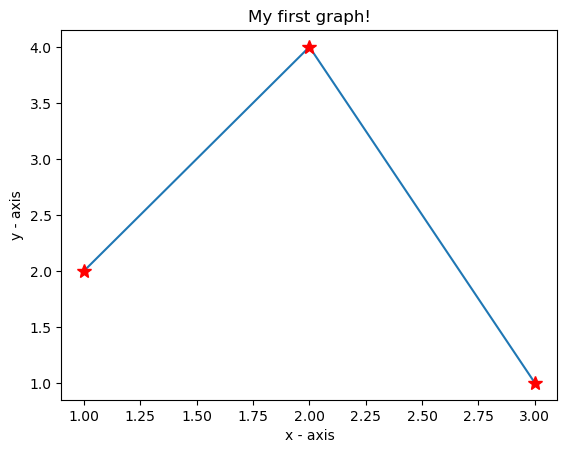

In [4]:
x = [1, 2, 3]  # x axis values as Python list
y = [2, 4, 1]  # corresponding y axis values as Python list
plt.plot(x, y)  # plotting the points
plt.xlabel('x - axis')  # naming the x axis
plt.ylabel('y - axis')  # naming the y axis
plt.title('My first graph!')  # giving a title to my graph

# What if make a second plot right after making the first?
plt.plot(x, y, linestyle='', marker='*', markersize=10, color='red')

## Let's get a little more complicated with plots.

In [5]:
# numpy.linspace returns evenly spaced numbers over a specified interval.
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

# Transform the data using cosign and exponential functions using broadcasting.
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

Create the plot figure and set up the space. We are defining two plots with one column and two rows. Set the first plot for all the following calls until changed. Note the use of **kwargs in the documentation. This means all the rest of the possible keyword arguments that can be passed into the plotting call. You will not see all possible arguments in the function defintion because the the kwargs are passed to sub-routines as well. So you may need to dig a bit to get the argument you need.

Text(0, 0.5, 'Undamped')

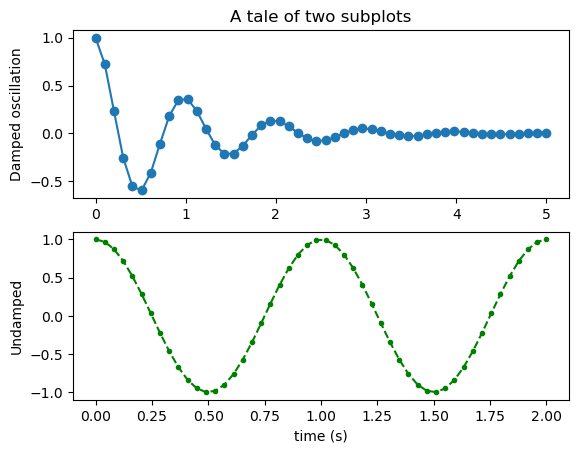

In [6]:
nrows = 2  # Number of plots per row
ncols = 1  # Number of plots per columns
plt.subplot(nrows, ncols, 1)  # plt.subplot(nrows, ncols, index, **kwargs)

# Plot the data using large plotting symbol and a line connecting the symbols using the shorthand
# notation in the third position. The shorthand is documented and I always need to look it up. Few
# people memorize it, just use what you remember and look up the rest. Default values are used unless
# you override the default.
plt.plot(x1, y1, 'o-')
plt.title('A tale of two subplots')  # Now we add a title to the plot.
plt.ylabel('Damped oscillation')  # And add a y-axis because we are scientists! But no x-lable, yet.

# Now we switch to the second plot. So all following calls go to second plotting area.
plt.subplot(nrows, ncols, 2)  # plt.subplot(nrows, ncols, index)
# Make a plot using small symbols and dashed line.
# Also we choose to use green for plot symbol and line color.
plt.plot(x2, y2, '.--', color='green')
plt.xlabel('time (s)')  # Now we add a x-axis title to the second plot.
# And of coures a y-axix because we are not heathens. But notice the label only attaches to
# the second plot because we are working on the second plot. We didn't add a label to first
# plot x-axis.
plt.ylabel('Undamped')  

## Let's plot a distribution.

Set the seed for random value. This means we get the same result every time.

In [7]:
from matplotlib.ticker import MaxNLocator
np.random.seed(19680801)

In [8]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)  # Make the data

num_bins = 50

This is setting up the figure and axes variables. Figure is the general white space and axes is the plotting part. We can have one figure but as many axes as we want. Axis is the x and y axis that have tick marks and lables.

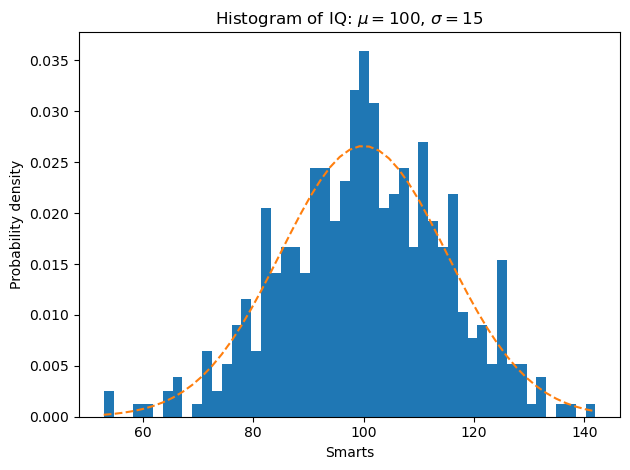

In [9]:
fig, axes = plt.subplots()

# Plot the histogram of the data
n, bins, patches = axes.hist(x, num_bins, density=1)

# add a 'best fit' line to the plot
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu)) ** 2)
axes.plot(bins, y, '--')
axes.set_xlabel('Smarts')
axes.set_ylabel('Probability density')

# The 'r' at the start of a string means regular expression. This forces
# the string to be exactly as it is listed in memory. The specail
# characters are used as escape sequences to set Greek letters.'
axes.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel. Not sure it's needed?
fig.tight_layout()  # This adjusts the spaceing at ends of plot ranges.

## Let's get crazy and mix plots!

In [10]:
np.random.seed(19680801)  # Setting the seed to get same result each time
data = np.random.randn(2, 100)  # Make a 2-D array

This is setting up the figure and set how many plots we are going to make. We are making two rows and two columns for a total of four plots. We are also stating how big the figure size should be. The numbers for figsize are *100 = pixels. So (5, 5) is (500, 500) pixels.
    

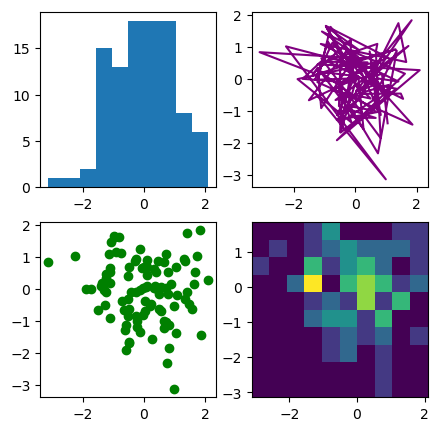

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# When we made the figure and returned axes on line above, that is a Python list of length two
# with each element being a Python list of lenght two. This means we can make
# each plot or update each plot by referencing the axes. Start at upper
# left. [row, column] Axes is the plot, axis is the x and y axis. We will assign a variable
# to the returned value to hold the returned Axes if we want to modify later.
ax_Top_Left = axes[0, 0].hist(data[0])  # Histogram of one slice of the 2-D array.
ax_Bottom_Left = axes[1, 0].scatter(data[0], data[1], color='green')  # Scatter of 1 slice vs. other slice
ax_Top_Right = axes[0, 1].plot(data[0], data[1], color='purple')  # Plot of 1 slice with other as axis
ax_Bottom_Right = axes[1, 1].hist2d(data[0], data[1])  # 2 dimentional histogram

## Some really complicated plotting to show how it can be done

In [12]:
from matplotlib.colors import BoundaryNorm
dx, dy = 0.05, 0.05  # Some constants. Make these smaller to increase the resolution.

Generate two 2-D grids for the x & y bounds. Don't worry much about this it is just to make some data to plot.

In [13]:
y, x = np.mgrid[slice(1, 5 + dy, dy), slice(1, 5 + dx, dx)]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x and y are bounds, so z should be the value *inside* those bounds. Therefore, remove the last value from the z array. Again don't worry too much about this just making data for an example plot.

In [14]:
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

Pick the desired colormap, sensible levels, and define a normalization instance which takes data values and translates those into levels. PiYG is the name of the colormap.

In [15]:
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

Notice that the axes are split out using tuple syntax. This means we can reference with name only instead of needing to subset.

type((ax0, ax1)) <class 'tuple'>
type(ax0) <class 'matplotlib.axes._axes.Axes'>


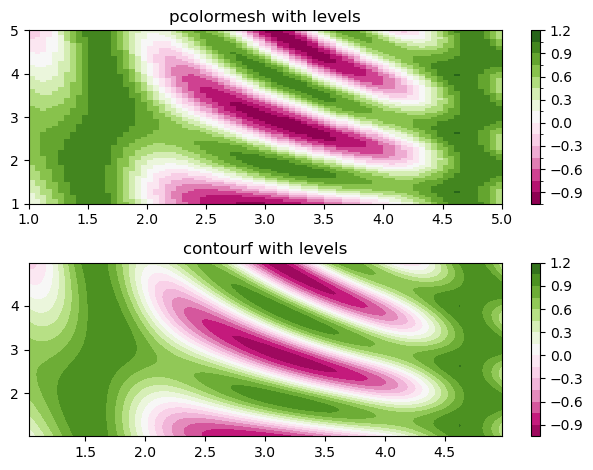

In [16]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
print('type((ax0, ax1))', type((ax0, ax1)))
print('type(ax0)', type(ax0))

# Now we make the plot for first row. We are using the color map defined above.
# If we didn't it would choose a default. Also notice that we are returning a
# variable that is used to set the colorbar. This variable is referencing the
# plotted data specifically not including the x and y axes.
im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)

# This is adding a colorbar to the plot.
# What if we didn't add a colorbar, what would happen?
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

# Contours are *point* based plots, so convert our bound into point centers.
# This is the second plot. Notice how we have called using ax1 from previous plt.subplots call.
cf = ax1.contourf(x[:-1, :-1] + dx / 2.0, y[:-1, :-1] + dy / 2.0, z, levels=levels, cmap=cmap)
fig.colorbar(cf, ax=ax1)  # Add a colorbar to the plot
ax1.set_title('contourf with levels')  # Set a title to second plot.

# Adjust spacing between two subplots so `ax1` title and `ax0` tick labels
# don't overlap. Try it without and see what happens. There is another way
# to finetune the spacing if you don't like this.
fig.tight_layout()